# Markov Simulation 

In this project, the goal was a program that simulates customer behaviour in a supermarket. To achieve that, I explored the data, I calculated a probability transition matrix (PTM), I implemented a customer class, I run a Monte-Carlo-Markov-Chain (MCMC) simulation for a single customer and extended the simulation for multiple customers. The provided dataset is an observation of how the clients move in a supermarket consisted of only 4 sections (spicies, fruits, dairy and drinks) and the checkout in weekdays of a signle week. Additionally to the general PTM I found it also interesting in calcuating a PTM of the clients' movement for each time range of the day (morning, afternoon and evening) and see how a random client would behave according to these probabilities

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
monday = pd.read_csv(f'/home/evangelo/decision-dill-student-code/week08/data/monday.csv', sep=';')
tuesday =pd.read_csv(f'/home/evangelo/decision-dill-student-code/week08/data/tuesday.csv', sep=';')
wednesday = pd.read_csv(f'/home/evangelo/decision-dill-student-code/week08/data/wednesday.csv', sep=';')
thursday = pd.read_csv(f'/home/evangelo/decision-dill-student-code/week08/data/thursday.csv', sep=';')
friday = pd.read_csv(f'/home/evangelo/decision-dill-student-code/week08/data/friday.csv', sep=';')

In [3]:
monday['day'] = 'monday'
tuesday['day'] = 'tuesday'
wednesday['day'] = 'wednesday'
thursday['day'] = 'thursday'
friday['day'] = 'friday'

In [4]:
weekdays = [monday, tuesday, wednesday, thursday, friday]
weekdays_name = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
locations = ['dairy', 'drinks', 'fruit', 'spices','checkout']

In [5]:
supermarket_all = pd.concat(weekdays)

In [6]:
supermarket_all.head()

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday


In [7]:
supermarket_all

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
5120,2019-09-06 21:50:00,1500,dairy,friday
5121,2019-09-06 21:50:00,1507,checkout,friday
5122,2019-09-06 21:50:00,1508,checkout,friday
5123,2019-09-06 21:50:00,1509,drinks,friday


In [8]:
supermarket_all['timestamp'] = pd.to_datetime(supermarket_all['timestamp'])

In [9]:
supermarket_all['hour'] = supermarket_all['timestamp'].dt.hour

In [10]:
supermarket_all['day'] = supermarket_all['timestamp'].dt.day

In [11]:
supermarket_all['minute'] = supermarket_all['timestamp'].dt.minute

In [12]:
for day in weekdays:
    day['timestamp'] = pd.to_datetime(day['timestamp'])
    day['hour'] = day['timestamp'].dt.hour
    day['minute'] = day['timestamp'].dt.minute
    day['day'] = day['timestamp'].dt.day
    day.set_index('timestamp', inplace=True)

In [13]:
monday

,customer_no,location,day,hour,minute
timestamp,,,,,
2019-09-02 07:03:00,1,dairy,2,7,3
2019-09-02 07:03:00,2,dairy,2,7,3
2019-09-02 07:04:00,3,dairy,2,7,4
2019-09-02 07:04:00,4,dairy,2,7,4
2019-09-02 07:04:00,5,spices,2,7,4
...,...,...,...,...,...
2019-09-02 21:49:00,1442,checkout,2,21,49
2019-09-02 21:49:00,1444,checkout,2,21,49
2019-09-02 21:49:00,1445,dairy,2,21,49


In [14]:
supermarket_all = supermarket_all.set_index('timestamp')

In [15]:
supermarket_all_groupped = supermarket_all.groupby(['customer_no', 'day']).resample('1Min').ffill()

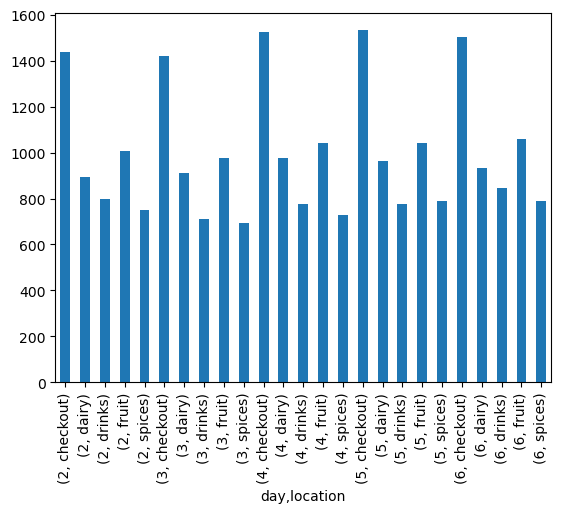

In [16]:
supermarket_all.groupby(['day', 'location'])['hour'].count().plot(kind='bar');

In [17]:
supermarket_all.columns

Index(['customer_no', 'location', 'day', 'hour', 'minute'], dtype='object')

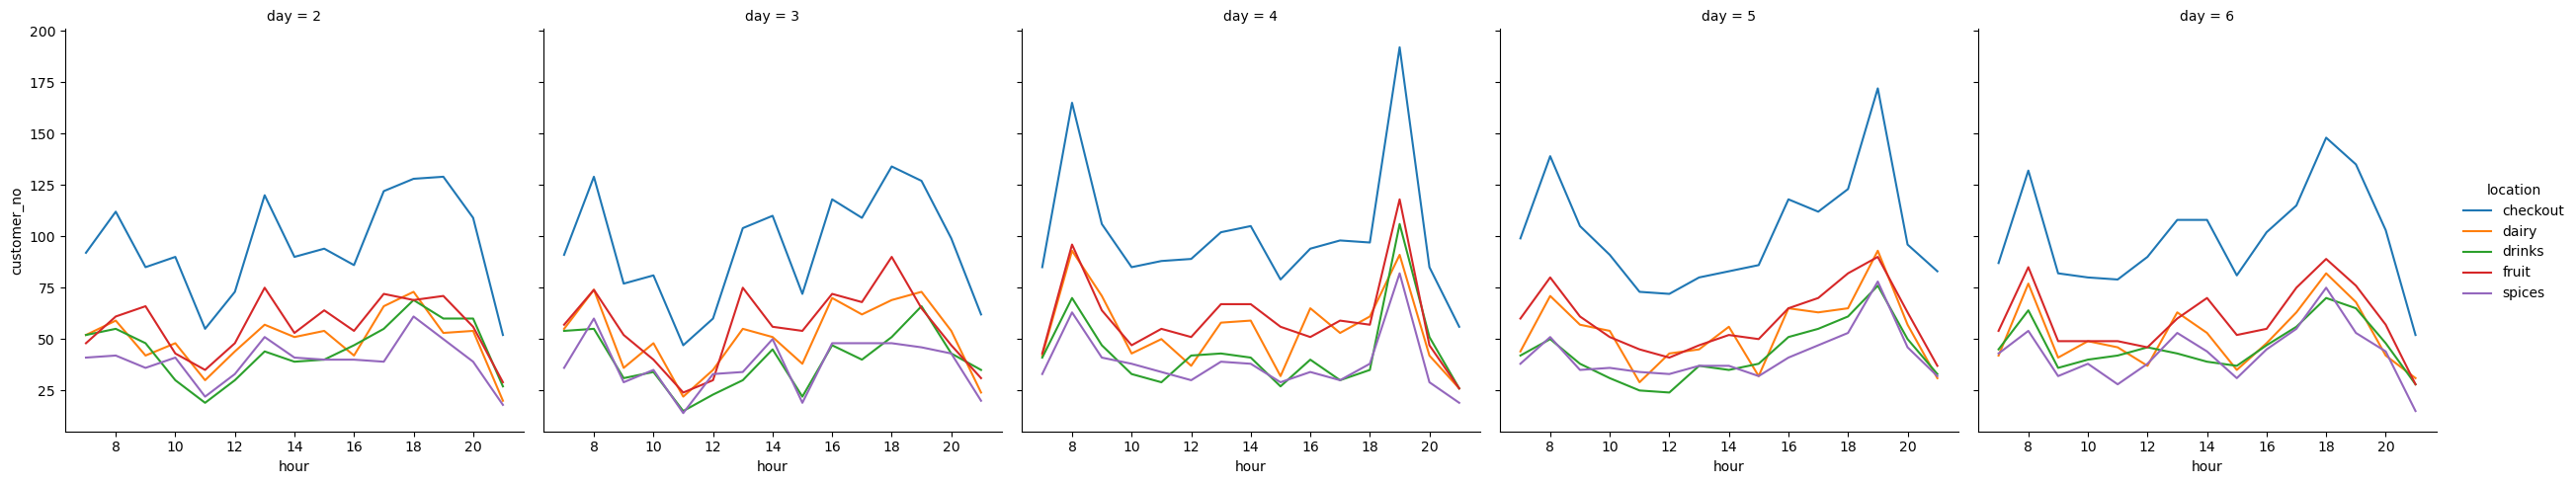

In [18]:
supermarket_plot = pd.DataFrame(supermarket_all.groupby(['location', 'hour', 'day'])['customer_no'].nunique())
sns.relplot(data=supermarket_plot,x='hour', y='customer_no', hue='location', kind='line', col='day');

<Axes: xlabel='timestamp', ylabel='Count'>

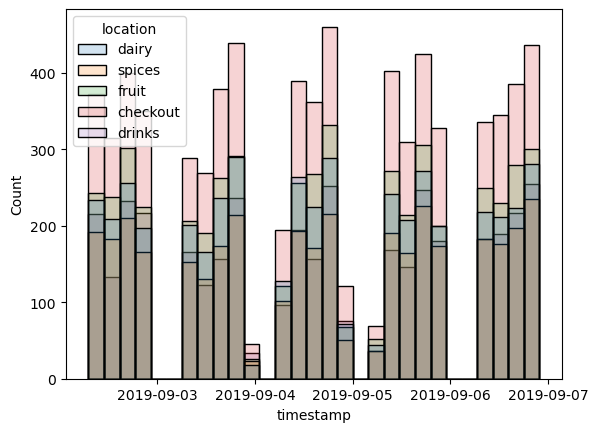

In [19]:
sns.histplot(data=supermarket_all, x='timestamp', hue='location', alpha=0.2)

In [20]:
weekdays = [monday, tuesday, wednesday, thursday, friday]
weekdays_name = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday']
locations = ['dairy', 'drinks', 'fruit', 'spices','checkout']
for i,day in enumerate(weekdays):
    for location in locations:
        sum_location = supermarket_all[supermarket_all['location'] == location].count().sum()
        if location != 'checkout':
            print(f'At {weekdays_name[i]} {sum_location} people passed by {location} section')
        else:
            print(f'At {weekdays_name[i]} {sum_location} people checked out')

At monday 23395 people passed by dairy section
At monday 19525 people passed by drinks section
At monday 25610 people passed by fruit section
At monday 18770 people passed by spices section
At monday 37085 people checked out
At tuesday 23395 people passed by dairy section
At tuesday 19525 people passed by drinks section
At tuesday 25610 people passed by fruit section
At tuesday 18770 people passed by spices section
At tuesday 37085 people checked out
At wednesday 23395 people passed by dairy section
At wednesday 19525 people passed by drinks section
At wednesday 25610 people passed by fruit section
At wednesday 18770 people passed by spices section
At wednesday 37085 people checked out
At thursday 23395 people passed by dairy section
At thursday 19525 people passed by drinks section
At thursday 25610 people passed by fruit section
At thursday 18770 people passed by spices section
At thursday 37085 people checked out
At friday 23395 people passed by dairy section
At friday 19525 people 

In [21]:
supermarket_all.groupby(['timestamp', 'location']).count().fillna(0)

customer_no  day  hour  minute
timestamp           location                                
2019-09-02 07:03:00 dairy               2    2     2       2
2019-09-02 07:04:00 dairy               2    2     2       2
                    fruit               1    1     1       1
                    spices              3    3     3       3
2019-09-02 07:05:00 checkout            2    2     2       2
...                                   ...  ...   ...     ...
2019-09-06 21:50:00 checkout            2    2     2       2
                    dairy               1    1     1       1
                    drinks              1    1     1       1
                    fruit               1    1     1       1
                    spices              1    1     1       1

[13839 rows x 4 columns]

In [22]:
supermarket_all.groupby(['timestamp', 'location']).count().unstack(level=1).fillna(0)

customer_no                                day        \
location               checkout dairy drinks fruit spices checkout dairy   
timestamp                                                                  
2019-09-02 07:03:00         0.0   2.0    0.0   0.0    0.0      0.0   2.0   
2019-09-02 07:04:00         0.0   2.0    0.0   1.0    3.0      0.0   2.0   
2019-09-02 07:05:00         2.0   1.0    1.0   0.0    0.0      2.0   1.0   
2019-09-02 07:06:00         2.0   2.0    1.0   2.0    1.0      2.0   2.0   
2019-09-02 07:07:00         1.0   1.0    1.0   0.0    1.0      1.0   1.0   
...                         ...   ...    ...   ...    ...      ...   ...   
2019-09-06 21:46:00         0.0   0.0    1.0   4.0    0.0      0.0   0.0   
2019-09-06 21:47:00         2.0   1.0    0.0   1.0    0.0      2.0   1.0   
2019-09-06 21:48:00         2.0   3.0    0.0   2.0    0.0      2.0   3.0   
2019-09-06 21:49:00         0.0   2.0    1.0   0.0    1.0      0.0   2.0   
2019-09-06 21:50:00         2.0   1.0    1.0   1.0    1.0      2.0   1.0   

                                            hour                            \
location            drinks fruit spices checkout dairy drinks fruit spices   
timestamp                                                                    
2019-09-02 07:03:00    0.0   0.0    0.0      0.0   2.0    0.0   0.0    0.0   
2019-09-02 07:04:00    0.0   1.0    3.0      0.0   2.0    0.0   1.0    3.0   
2019-09-02 07:05:00    1.0   0.0    0.0      2.0   1.0    1.0   0.0    0.0   
2019-09-02 07:06:00    1.0   2.0    1.0      2.0   2.0    1.0   2.0    1.0   
2019-09-02 07:07:00    1.0   0.0    1.0      1.0   1.0    1.0   0.0    1.0   
...                    ...   ...    ...      ...   ...    ...   ...    ...   
2019-09-06 21:46:00    1.0   4.0    0.0      0.0   0.0    1.0   4.0    0.0   
2019-09-06 21:47:00    0.0   1.0    0.0      2.0   1.0    0.0   1.0    0.0   
2019-09-06 21:48:00    0.0   2.0    0.0      2.0   3.0    0.0   2.0    0.0   
2019-09-06 21:49:00    1.0   0.0    1.0      0.0   2.0    1.0   0.0    1.0   
2019-09-06 21:50:00    1.0   1.0    1.0      2.0   1.0    1.0   1.0    1.0   

                      minute                            
location            checkout dairy drinks fruit spices  
timestamp                                               
2019-09-02 07:03:00      0.0   2.0    0.0   0.0    0.0  
2019-09-02 07:04:00      0.0   2.0    0.0   1.0    3.0  
2019-09-02 07:05:00      2.0   1.0    1.0   0.0    0.0  
2019-09-02 07:06:00      2.0   2.0    1.0   2.0    1.0  
2019-09-02 07:07:00      1.0   1.0    1.0   0.0    1.0  
...                      ...   ...    ...   ...    ...  
2019-09-06 21:46:00      0.0   0.0    1.0   4.0    0.0  
2019-09-06 21:47:00      2.0   1.0    0.0   1.0    0.0  
2019-09-06 21:48:00      2.0   3.0    0.0   2.0    0.0  
2019-09-06 21:49:00      0.0   2.0    1.0   0.0    1.0  
2019-09-06 21:50:00      2.0   1.0    1.0   1.0    1.0  

[4363 rows x 20 columns]

In [23]:
monday_filled = monday.groupby('customer_no').resample('T').ffill()
tuesday_filled = tuesday.groupby('customer_no').resample('T').ffill()
wednesday_filled = wednesday.groupby('customer_no').resample('T').ffill()
thursday_filled = thursday.groupby('customer_no').resample('T').ffill()
friday_filled = friday.groupby('customer_no').resample('T').ffill()
weekdays_filled = [monday_filled, tuesday_filled, wednesday_filled,thursday_filled, friday_filled]

In [24]:
monday_filled['duplicate'] = monday_filled.duplicated(['customer_no', 'location'])
tuesday_filled['duplicate'] = tuesday_filled.duplicated(['customer_no', 'location'])
wednesday_filled['duplicate'] = wednesday_filled.duplicated(['customer_no', 'location'])
thursday_filled['duplicate'] = thursday_filled.duplicated(['customer_no', 'location'])
friday_filled['duplicate'] = friday_filled.duplicated(['customer_no', 'location'])

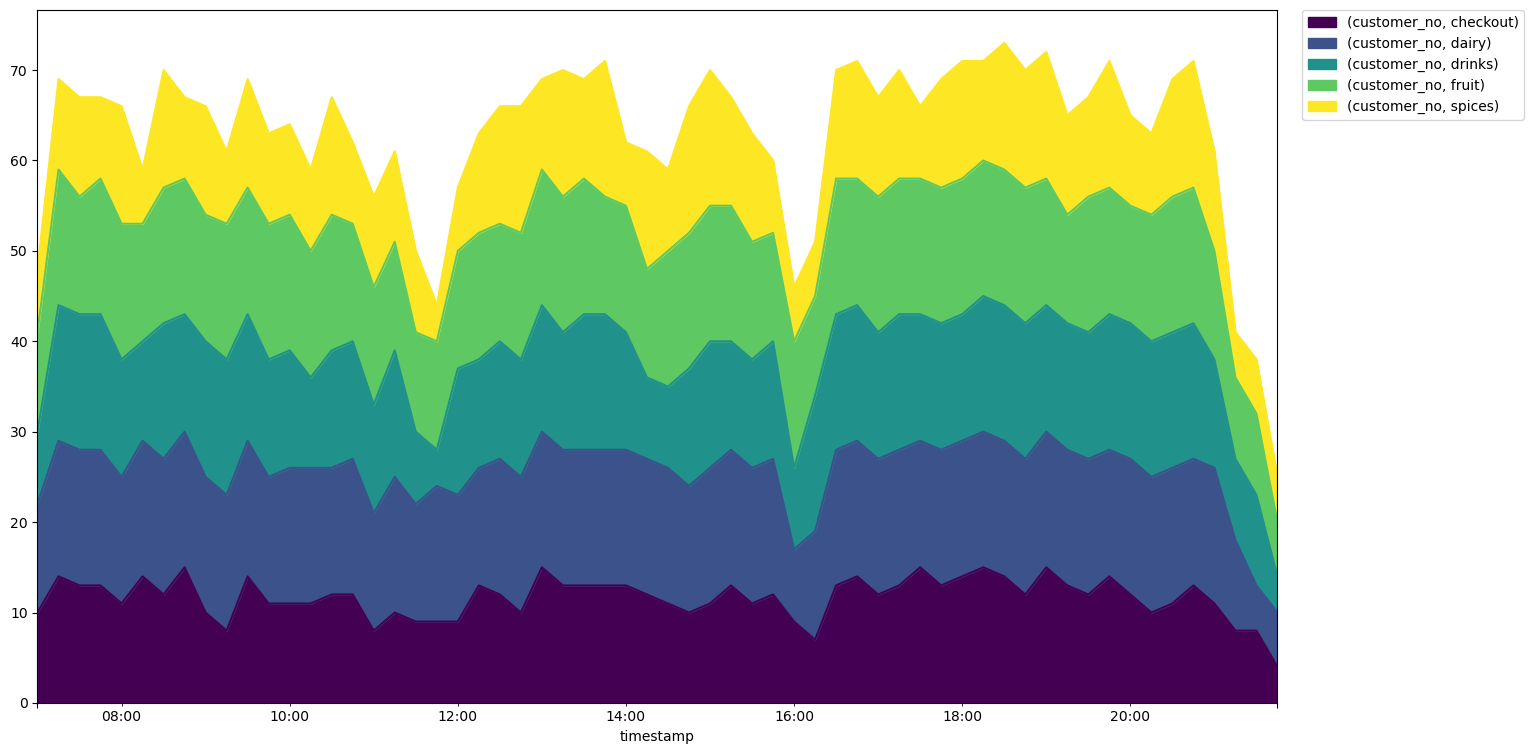

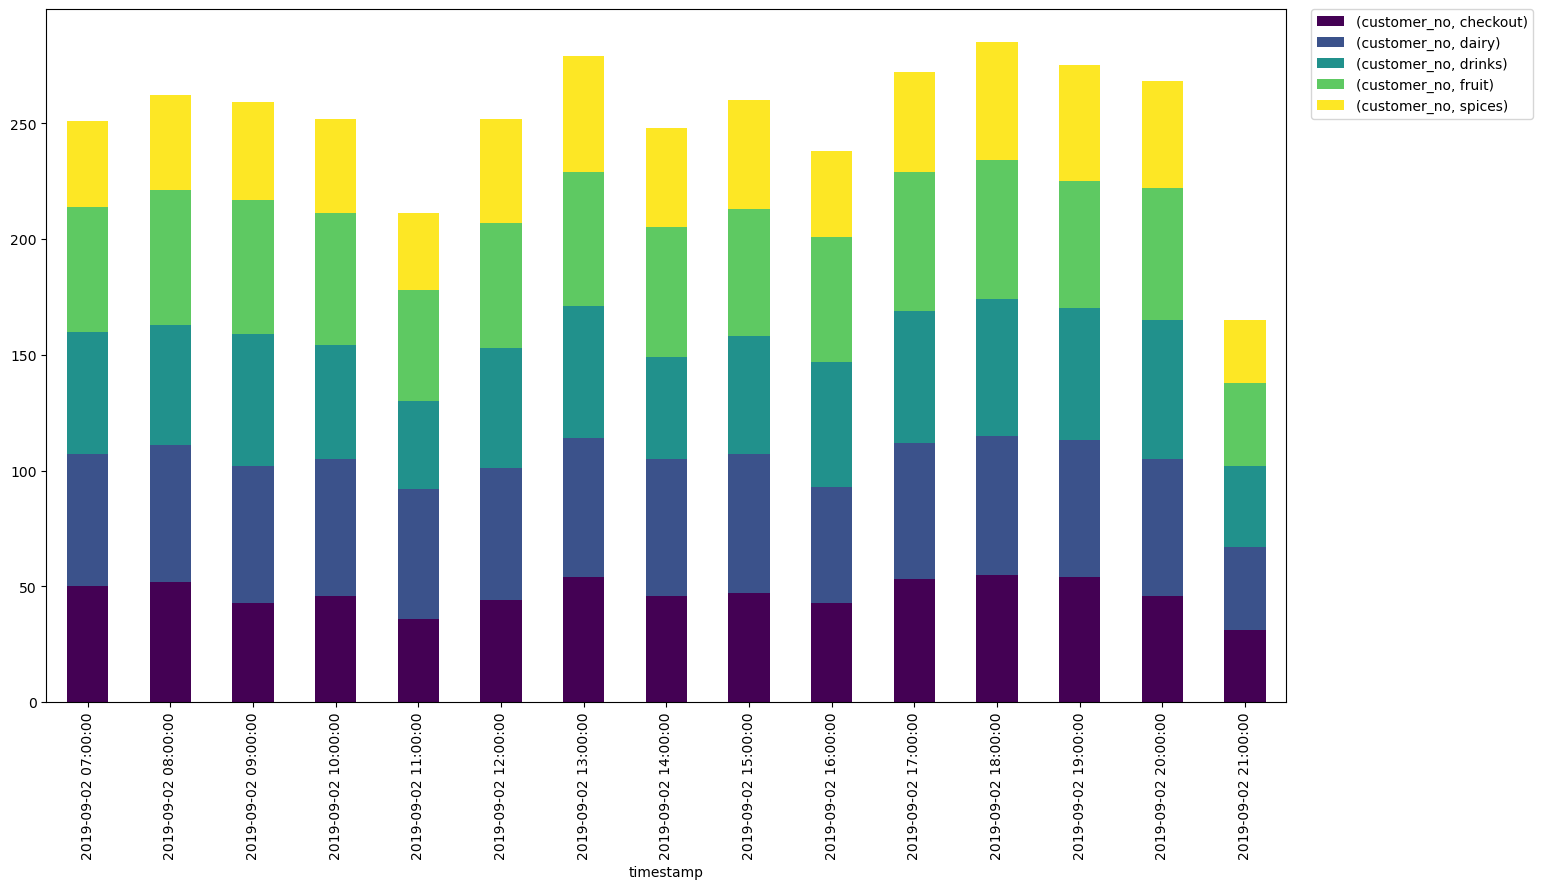

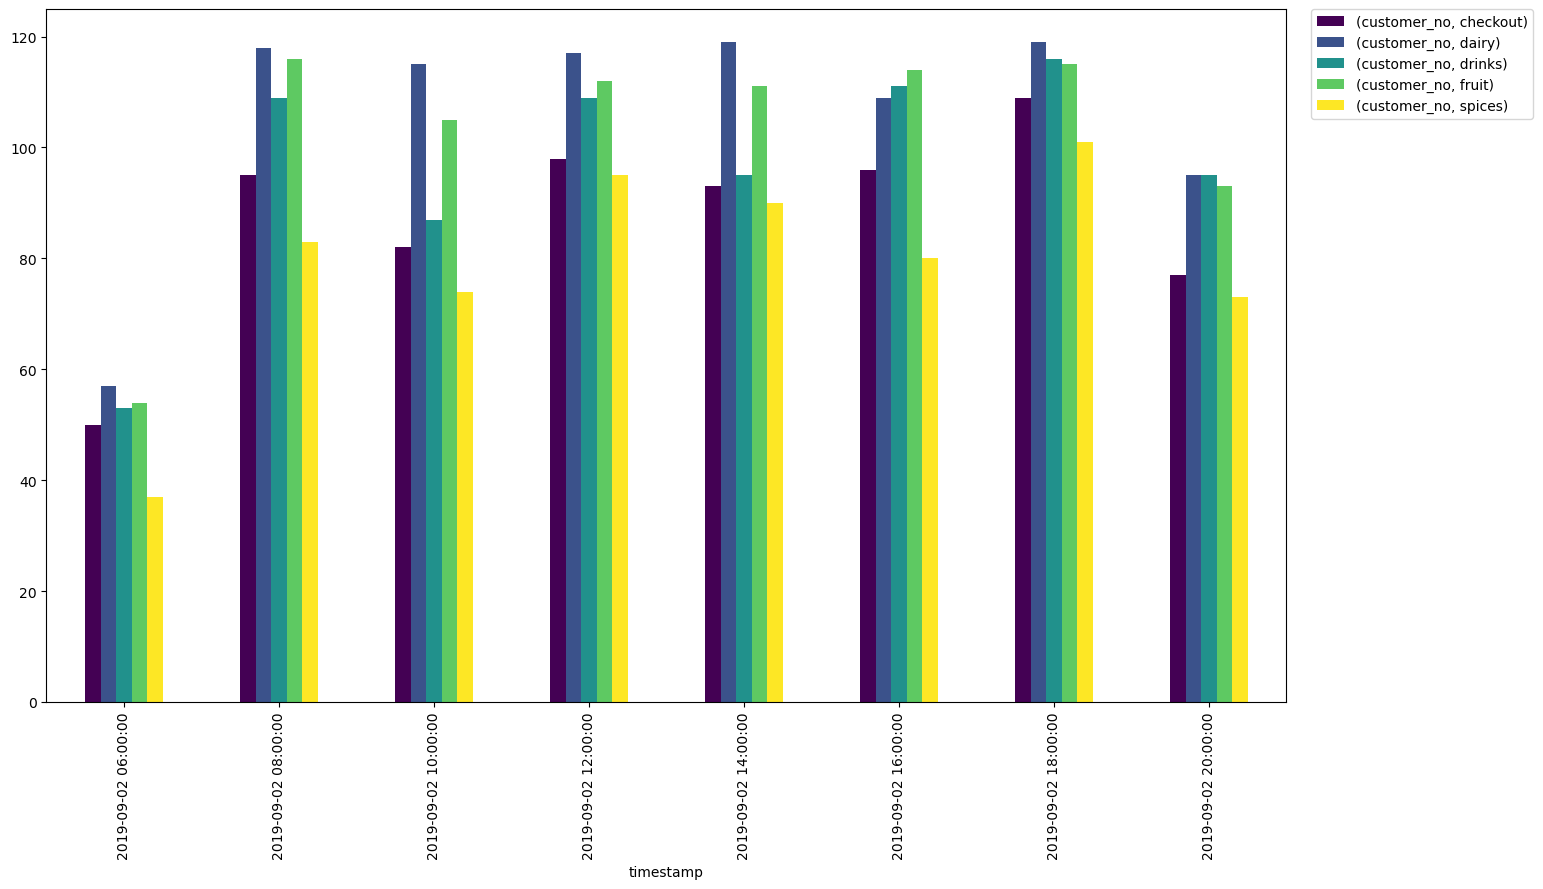

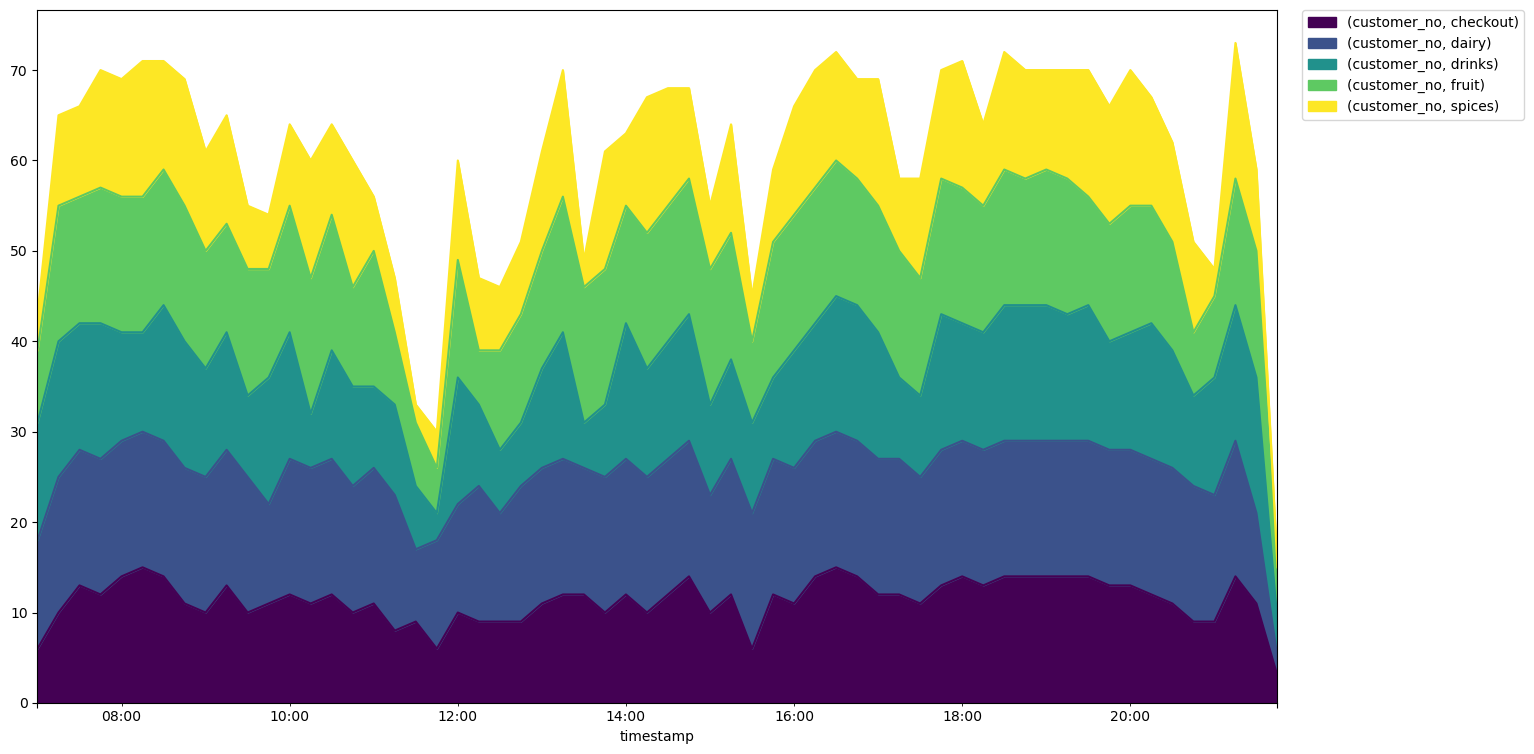

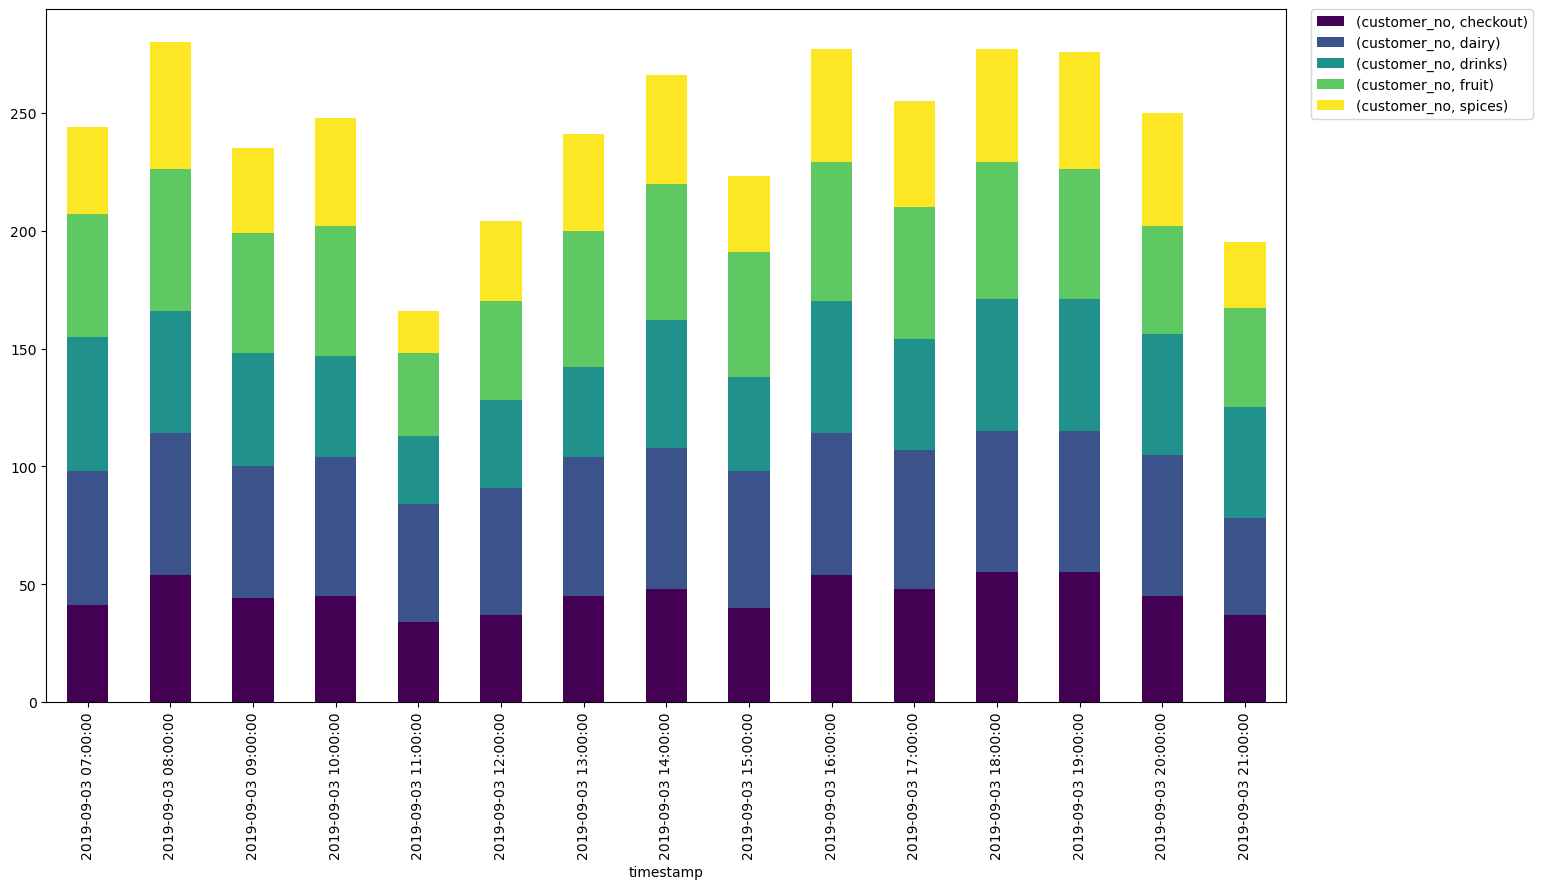

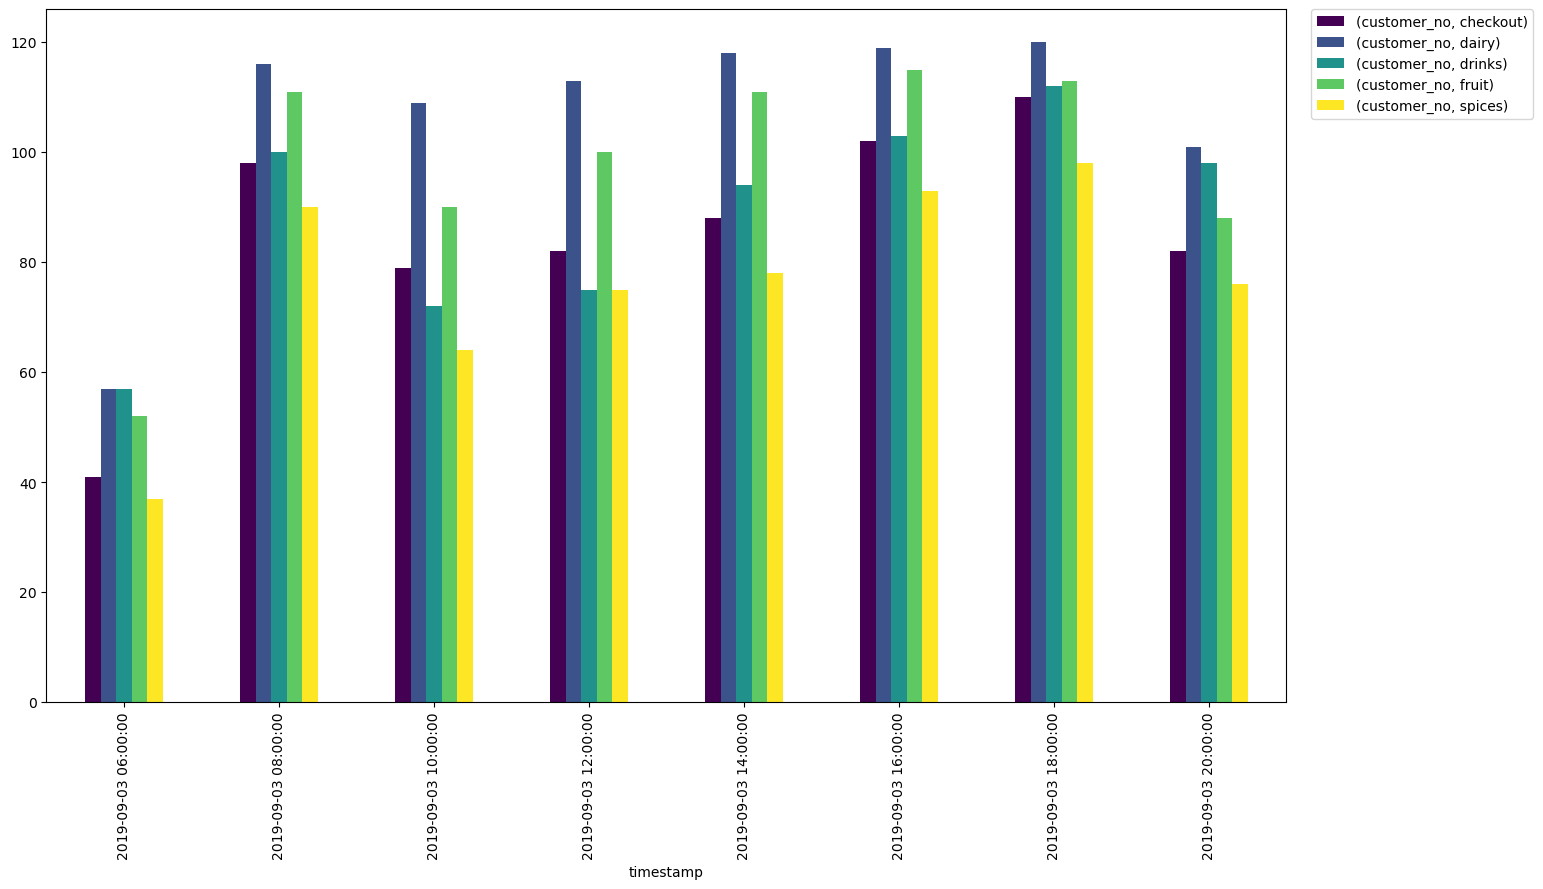

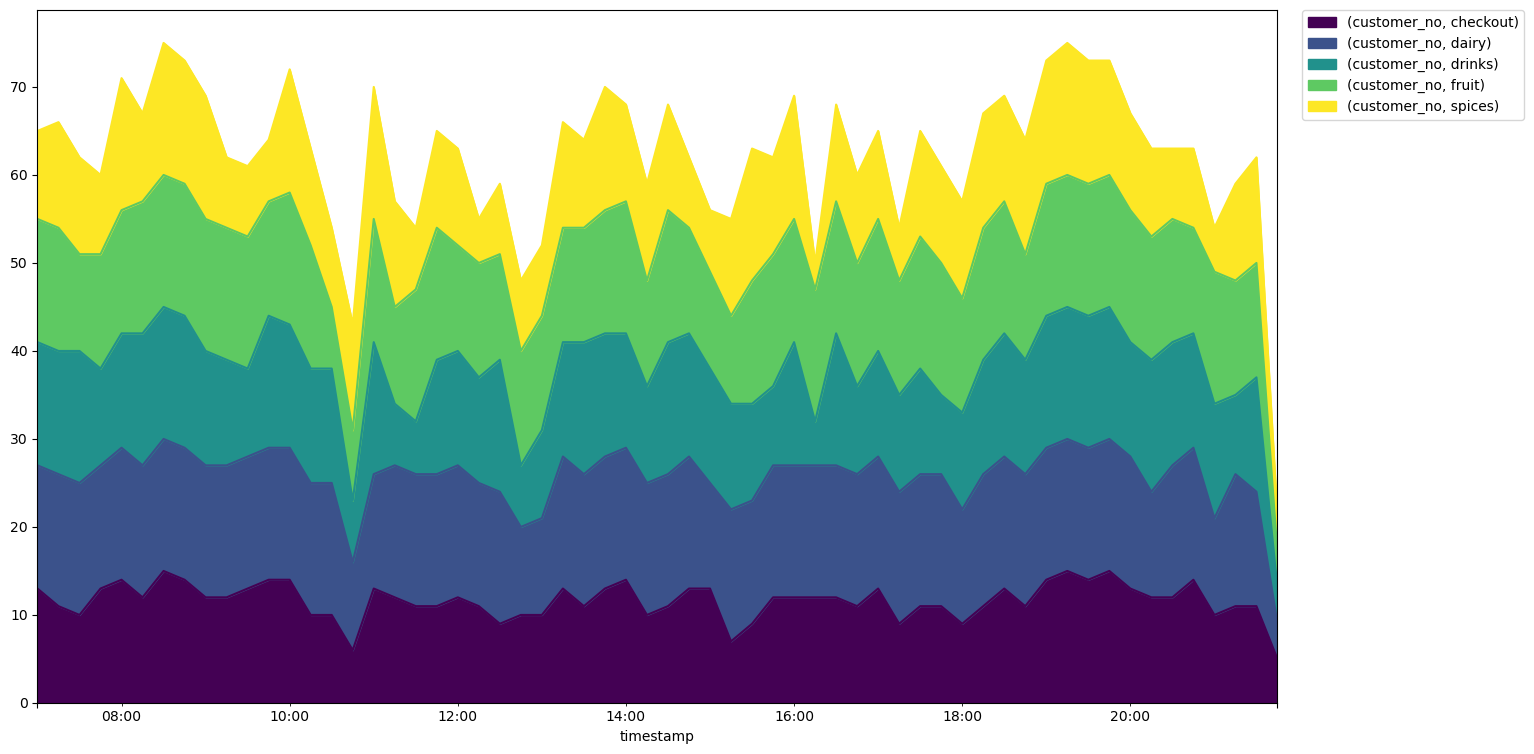

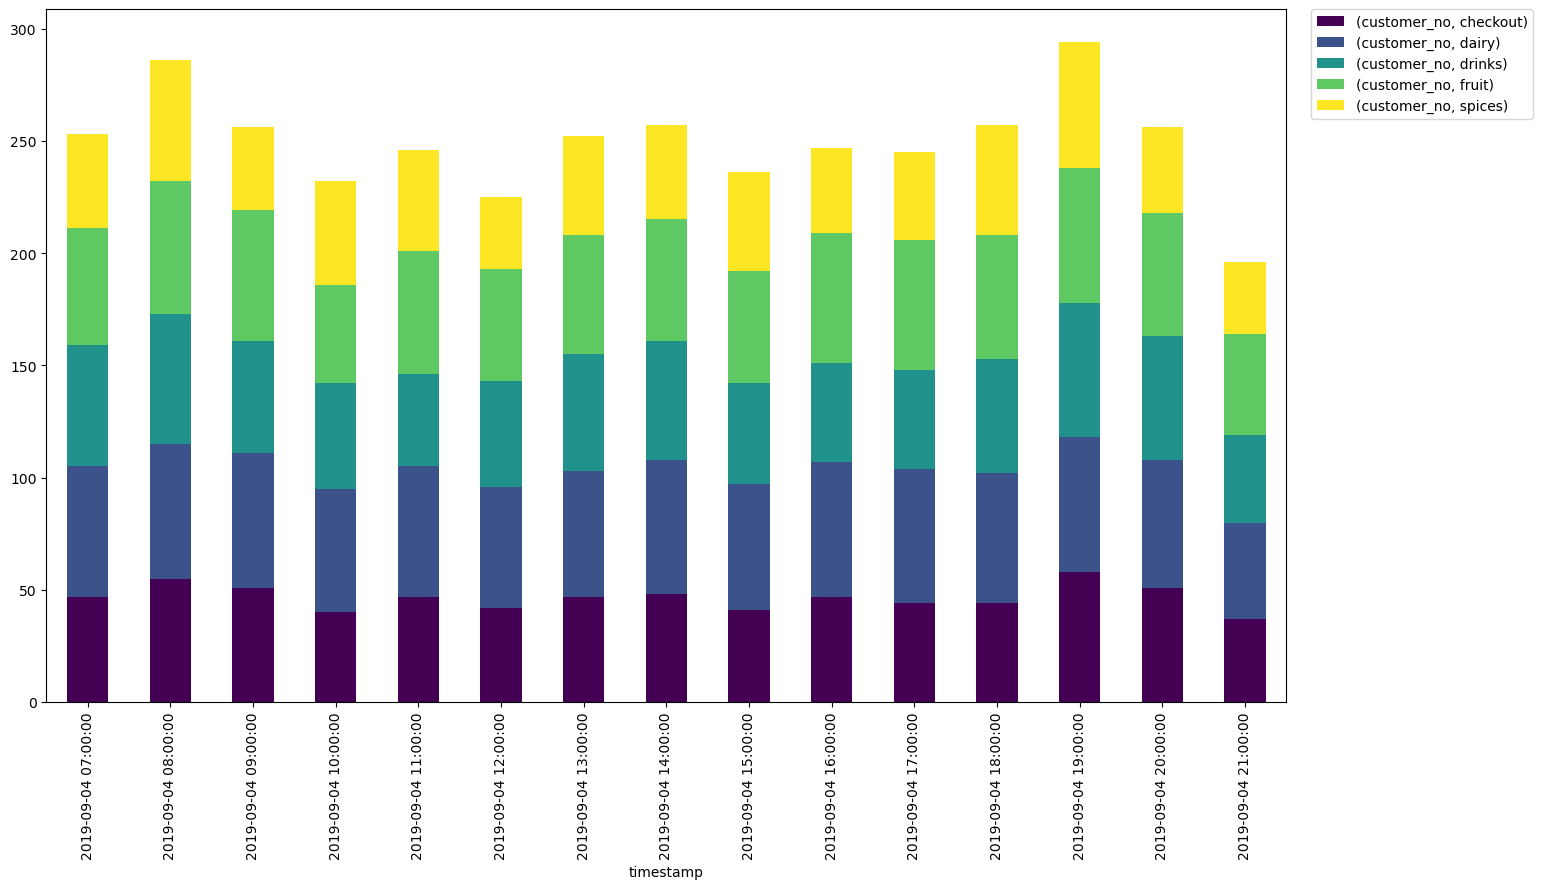

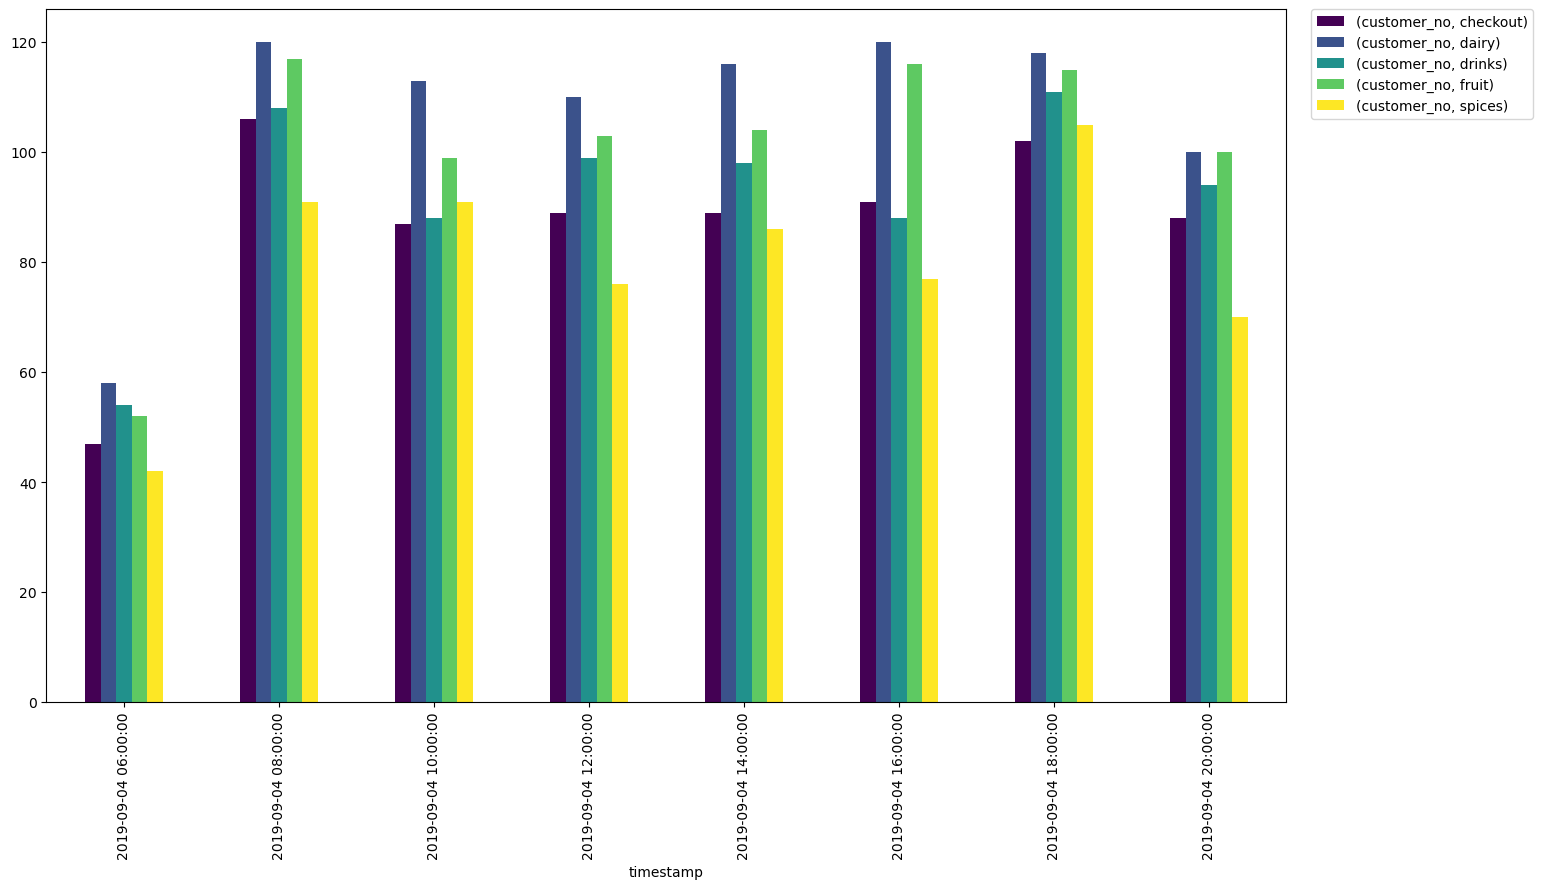

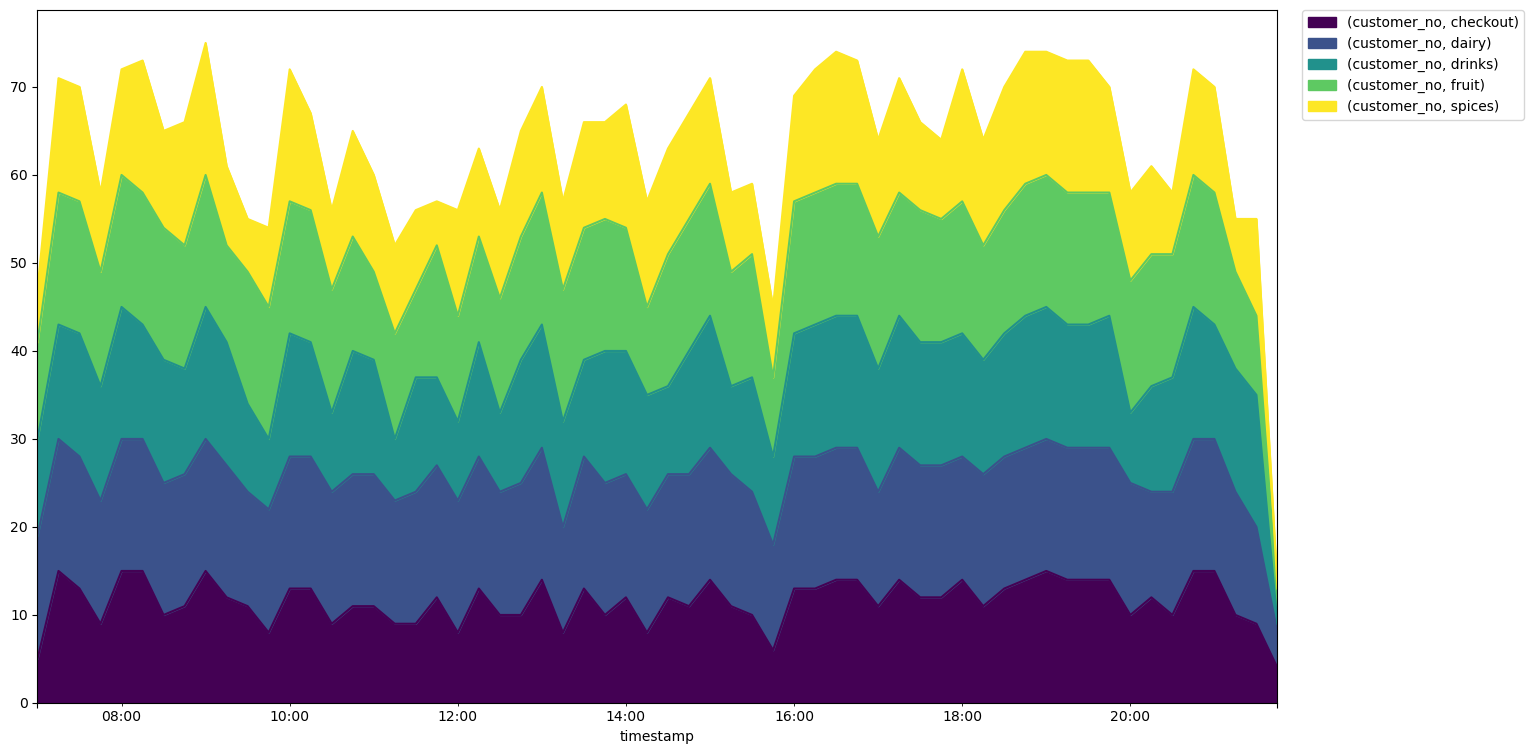

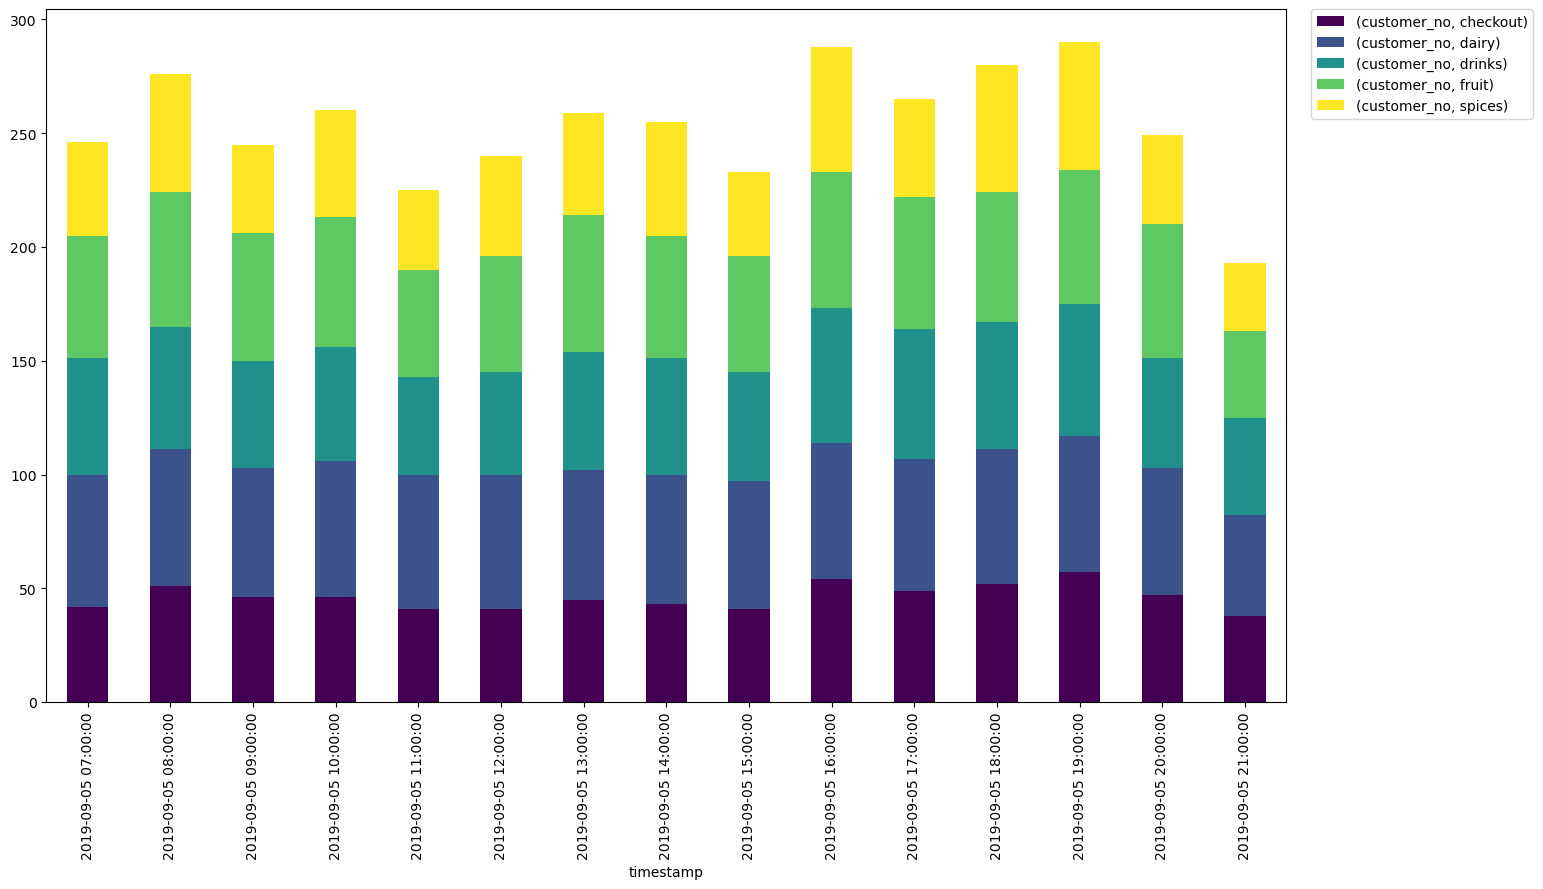

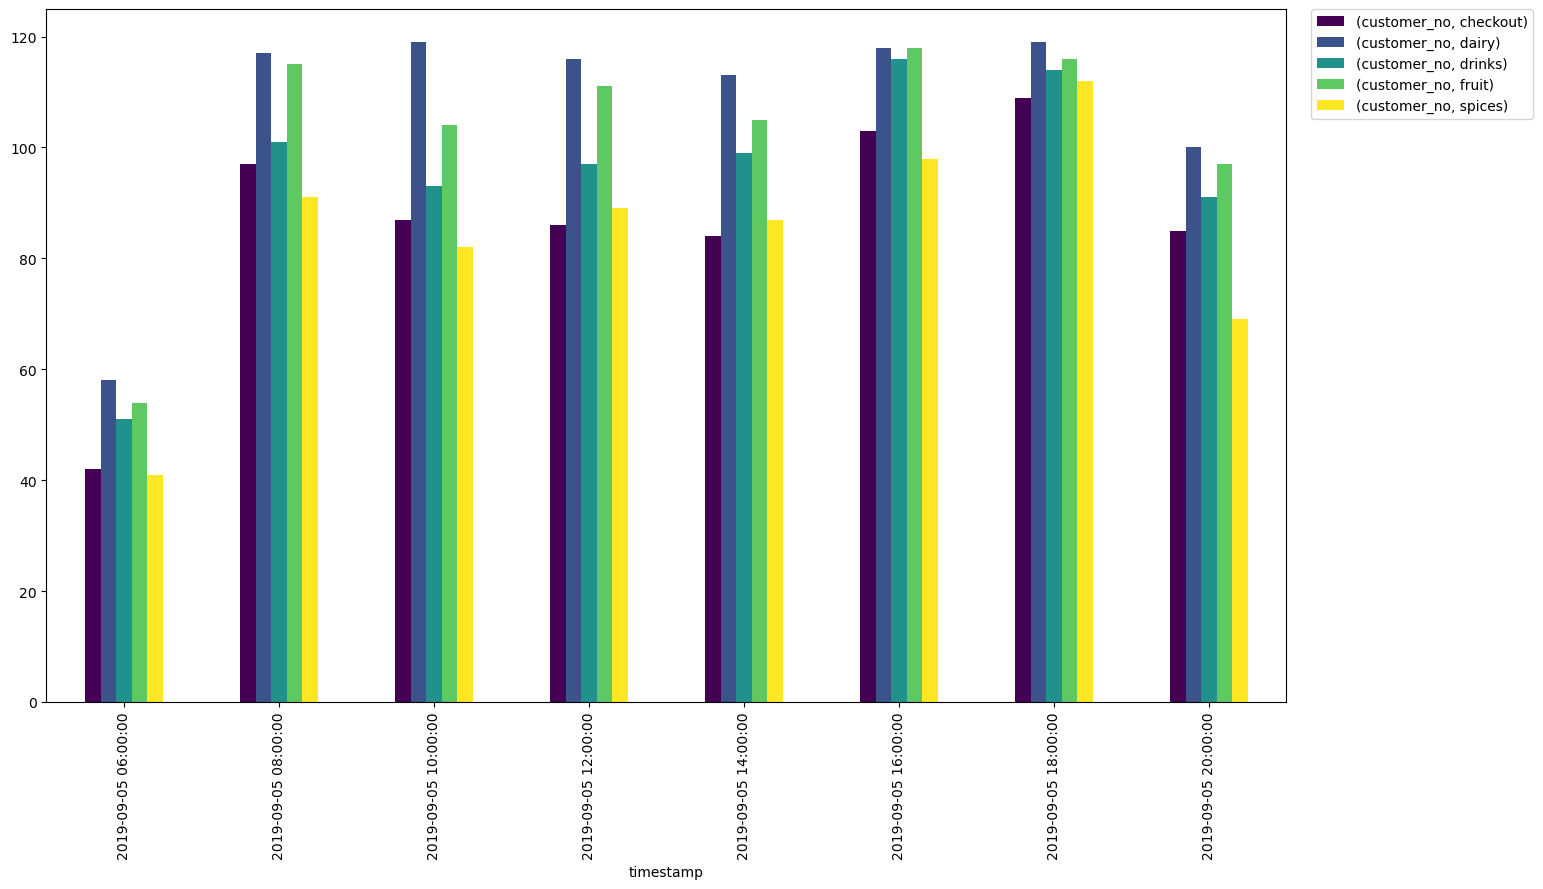

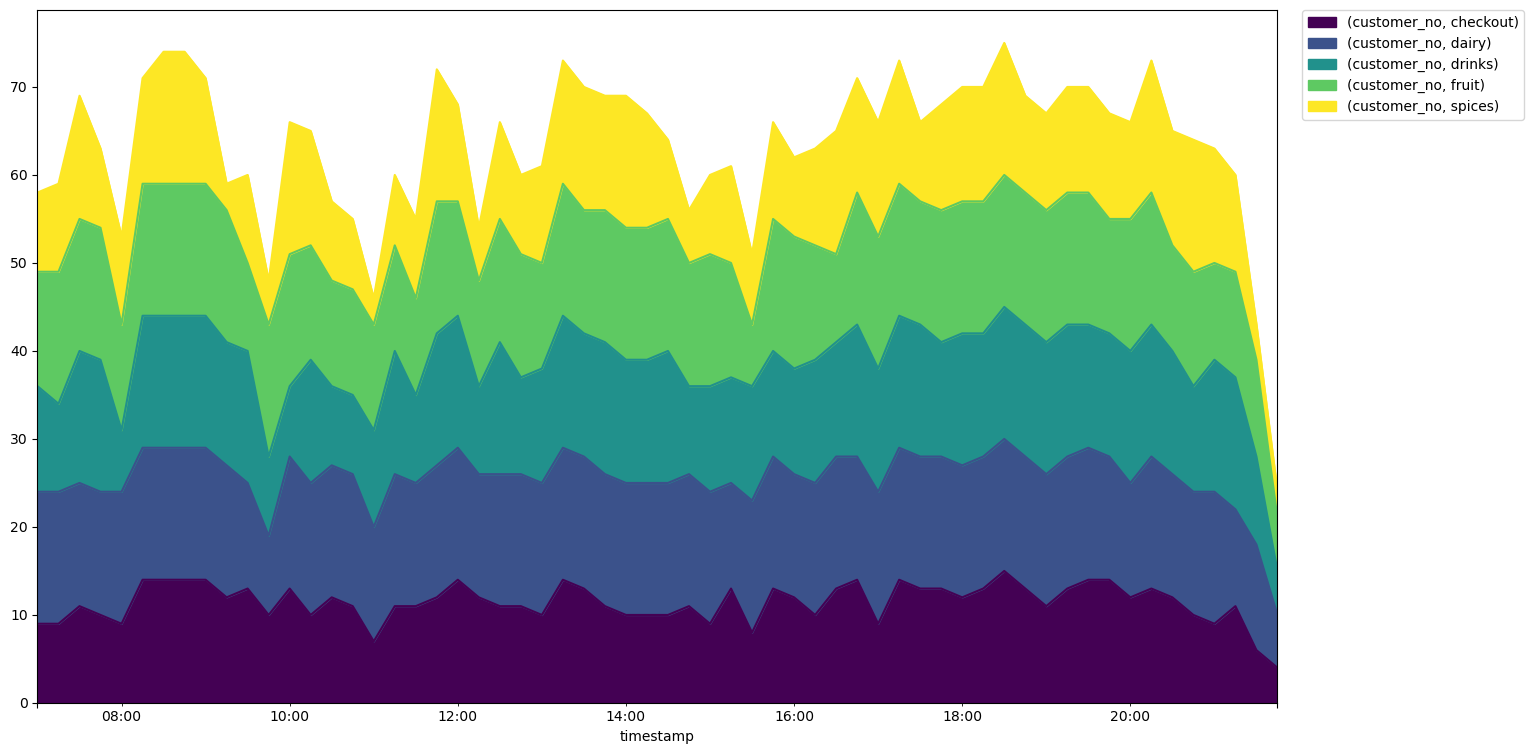

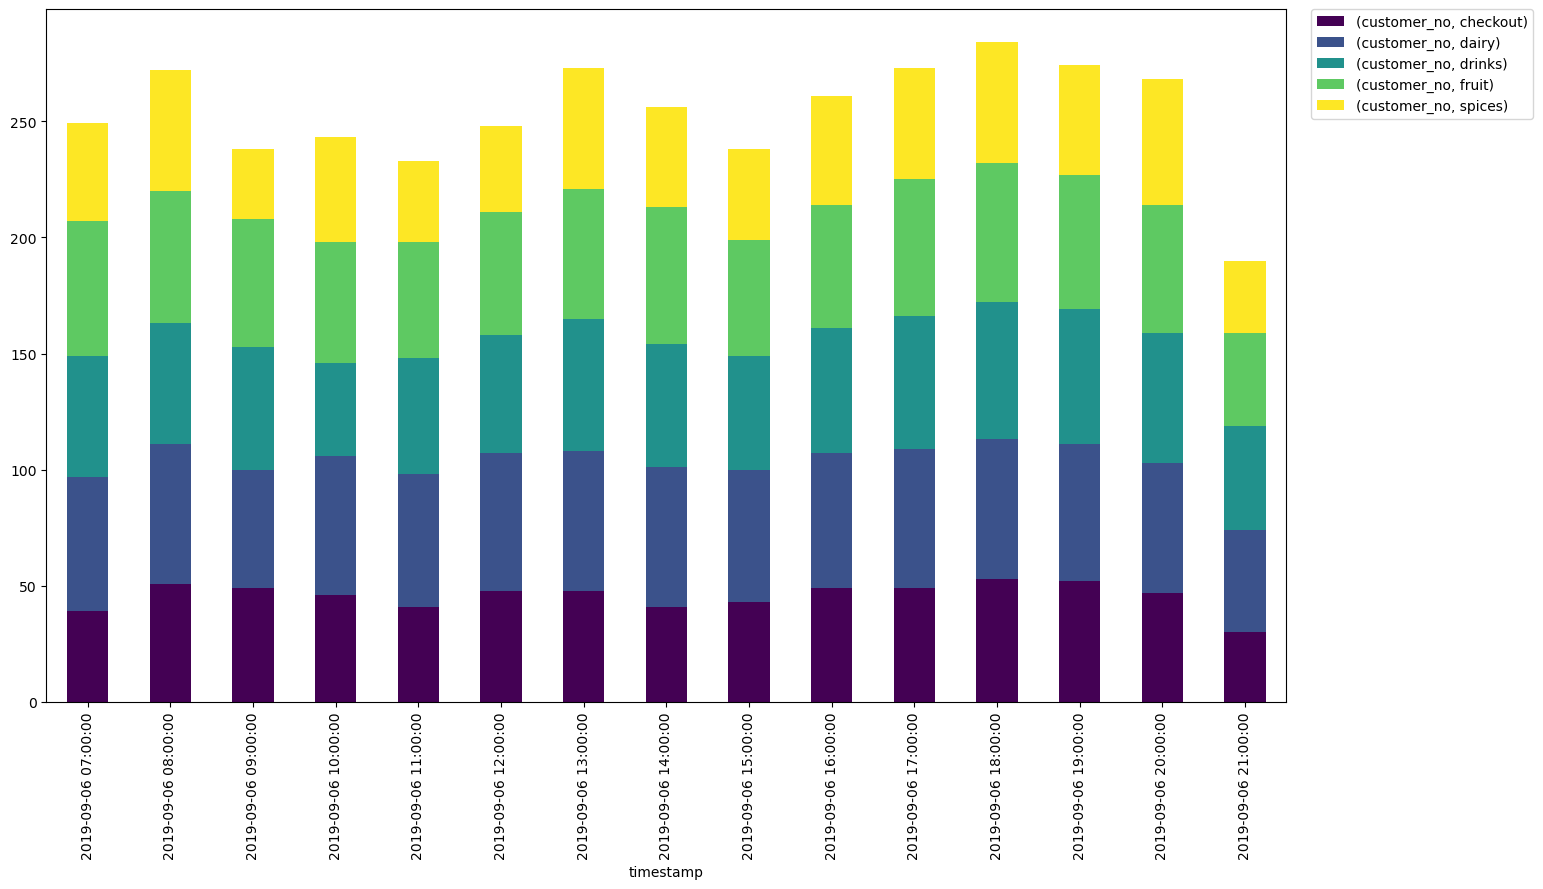

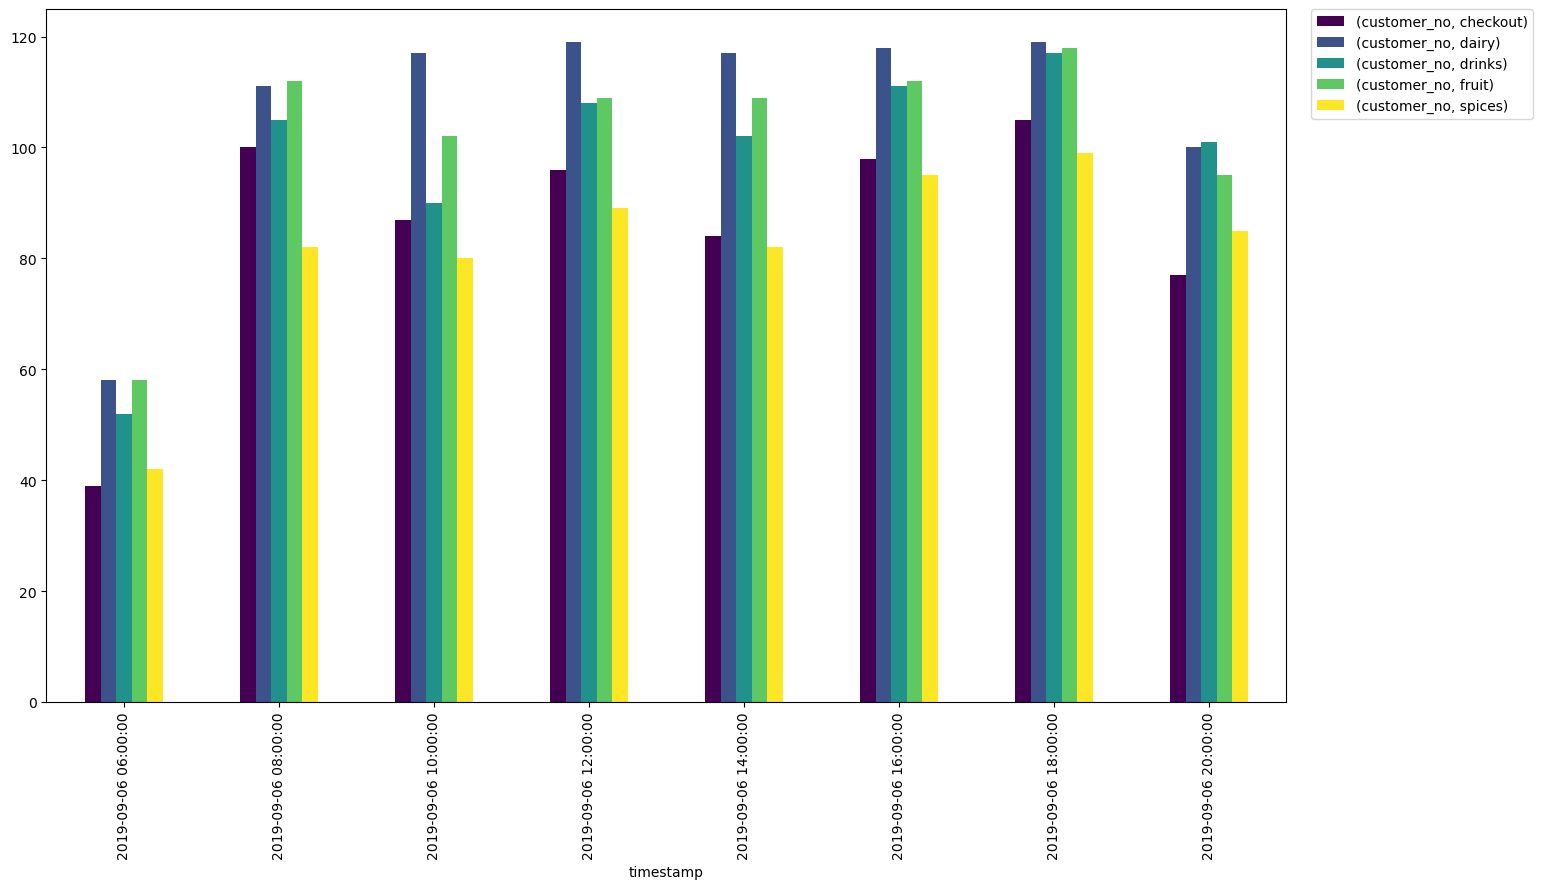

In [25]:
for day_filled in [monday_filled, tuesday_filled, wednesday_filled, thursday_filled, friday_filled]:
    day_filled.drop(columns=['duplicate','day','minute','hour'], axis=1).groupby(['timestamp', 'location']).count().unstack(level=1).resample('15T').count().plot.area(cmap='viridis')
    plt.gcf().set_size_inches(16, 9)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    day_filled.drop(columns=['duplicate','day','minute','hour'], axis=1).groupby(['timestamp', 'location']).count().unstack(level=1).resample('H').count().plot.bar(stacked=True, cmap='viridis')
    plt.gcf().set_size_inches(16, 9)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    day_filled.drop(columns=['duplicate','day','minute','hour'], axis=1).groupby(['timestamp', 'location']).count().unstack(level=1).resample('2H').count().plot.bar(cmap='viridis')
    plt.gcf().set_size_inches(16, 9)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [26]:
monday_filled

customer_no  location  day  hour  minute  \
customer_no timestamp                                                       
1           2019-09-02 07:03:00            1     dairy    2     7       3   
            2019-09-02 07:04:00            1     dairy    2     7       3   
            2019-09-02 07:05:00            1  checkout    2     7       5   
2           2019-09-02 07:03:00            2     dairy    2     7       3   
            2019-09-02 07:04:00            2     dairy    2     7       3   
...                                      ...       ...  ...   ...     ...   
1444        2019-09-02 21:48:00         1444    spices    2    21      48   
            2019-09-02 21:49:00         1444  checkout    2    21      49   
1445        2019-09-02 21:49:00         1445     dairy    2    21      49   
1446        2019-09-02 21:50:00         1446     dairy    2    21      50   
1447        2019-09-02 21:50:00         1447     fruit    2    21      50   

                                 duplicate  
customer_no timestamp                       
1           2019-09-02 07:03:00      False  
            2019-09-02 07:04:00       True  
            2019-09-02 07:05:00      False  
2           2019-09-02 07:03:00      False  
            2019-09-02 07:04:00       True  
...                                    ...  
1444        2019-09-02 21:48:00      False  
            2019-09-02 21:49:00      False  
1445        2019-09-02 21:49:00      False  
1446        2019-09-02 21:50:00      False  
1447        2019-09-02 21:50:00      False  

[10765 rows x 6 columns]

In [27]:
monday_filled_desample = monday.groupby('customer_no').ffill()
tuesday_filled_desample = tuesday.groupby('customer_no').ffill()
wednesday_filled_desample = wednesday.groupby('customer_no').ffill()
thursday_filled_desample = thursday.groupby('customer_no').ffill()
friday_filled_desample = friday.groupby('customer_no').ffill()

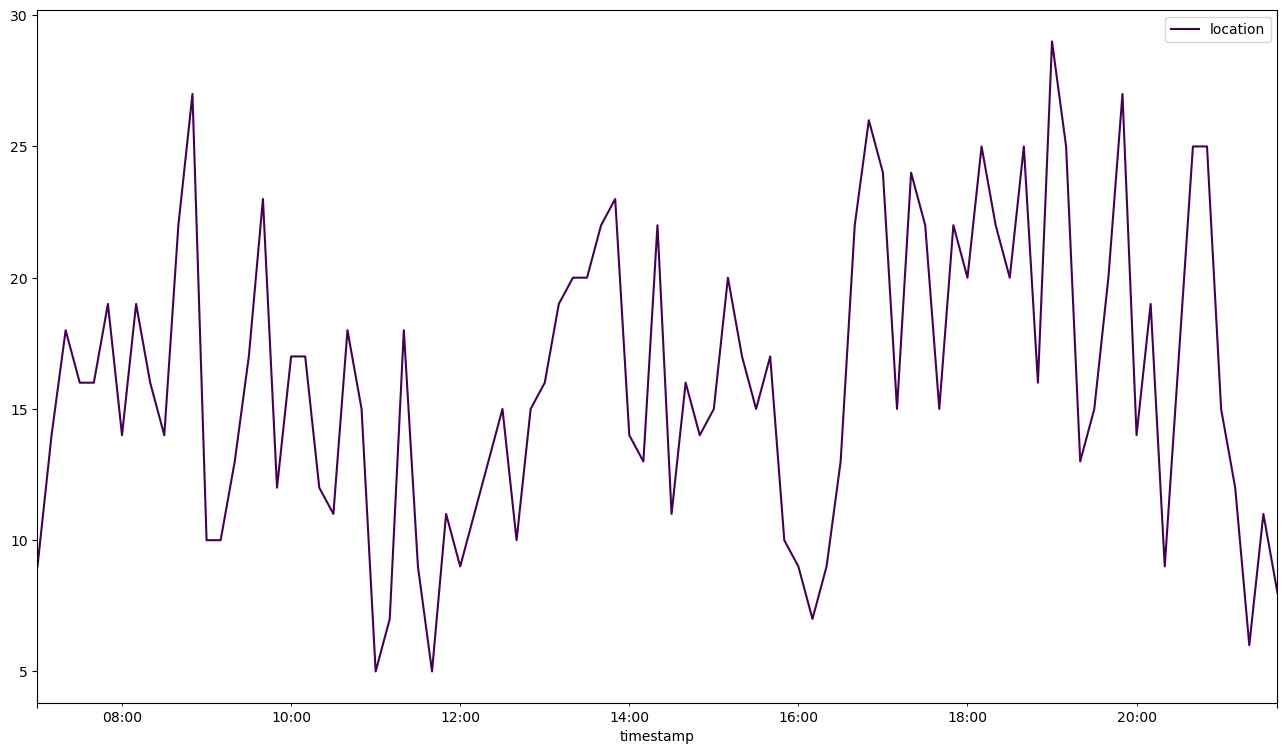

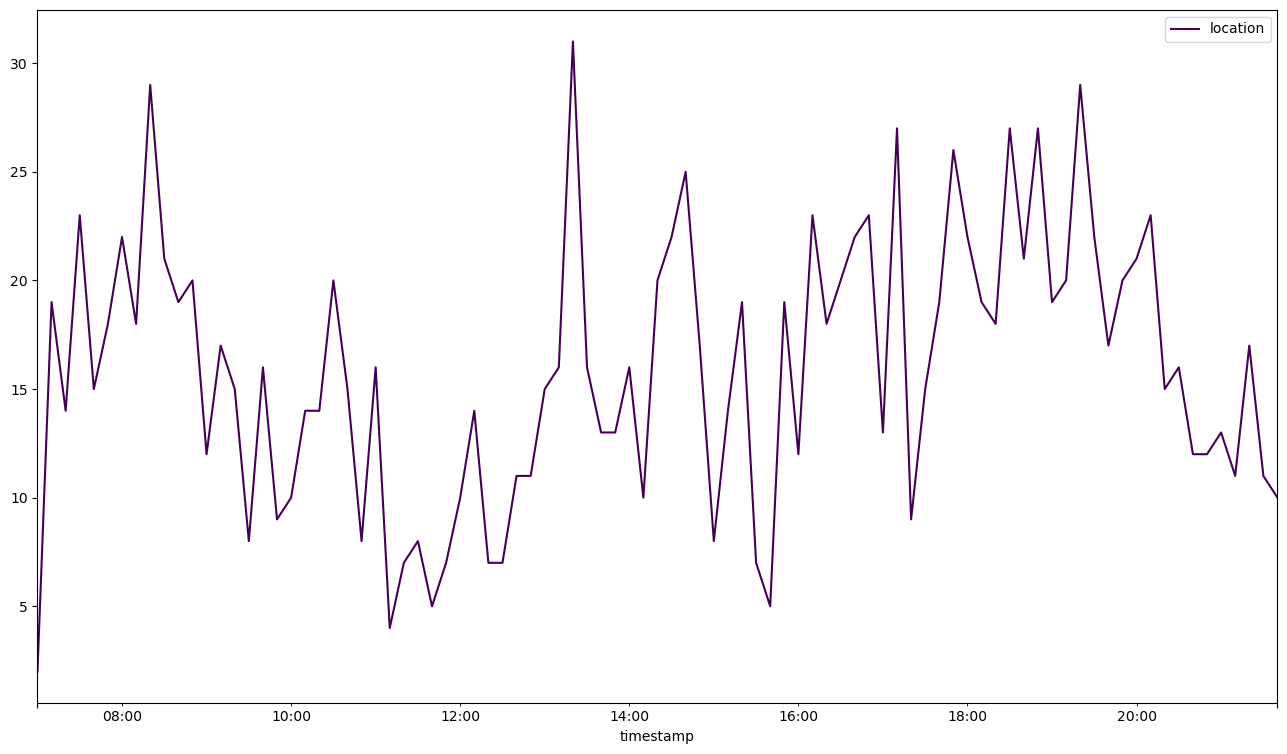

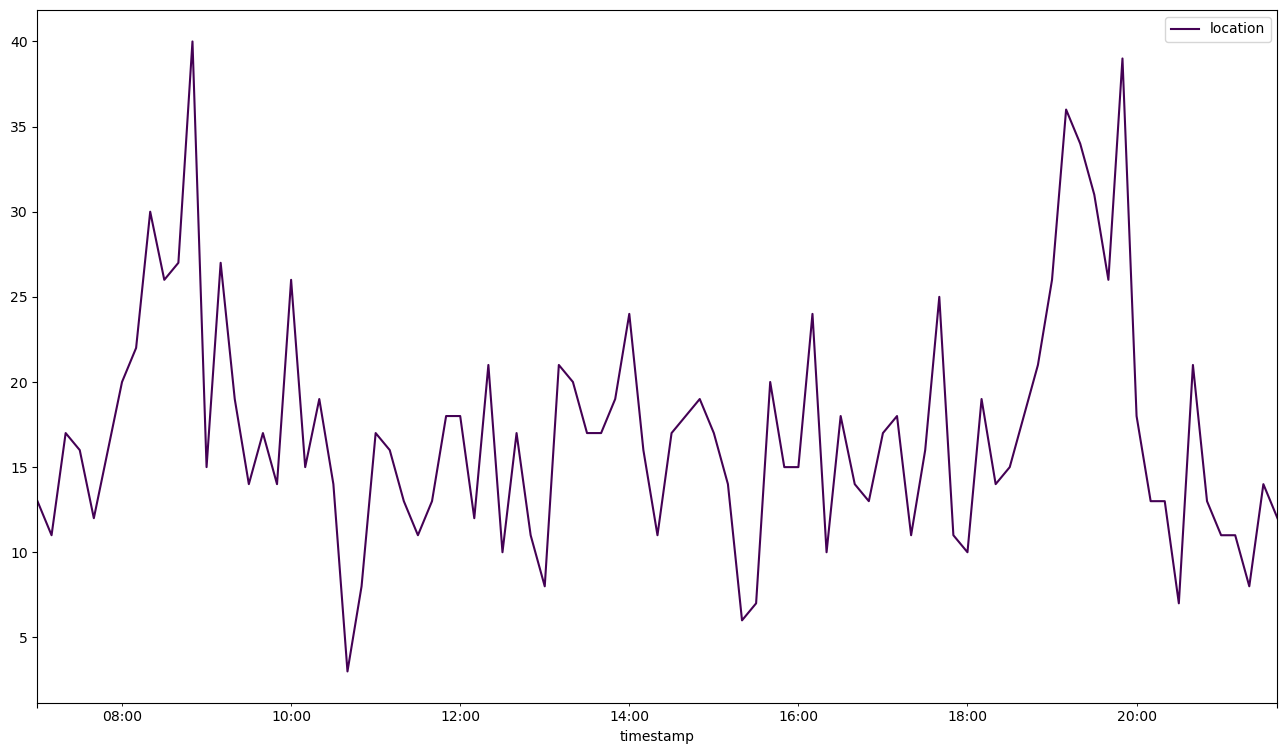

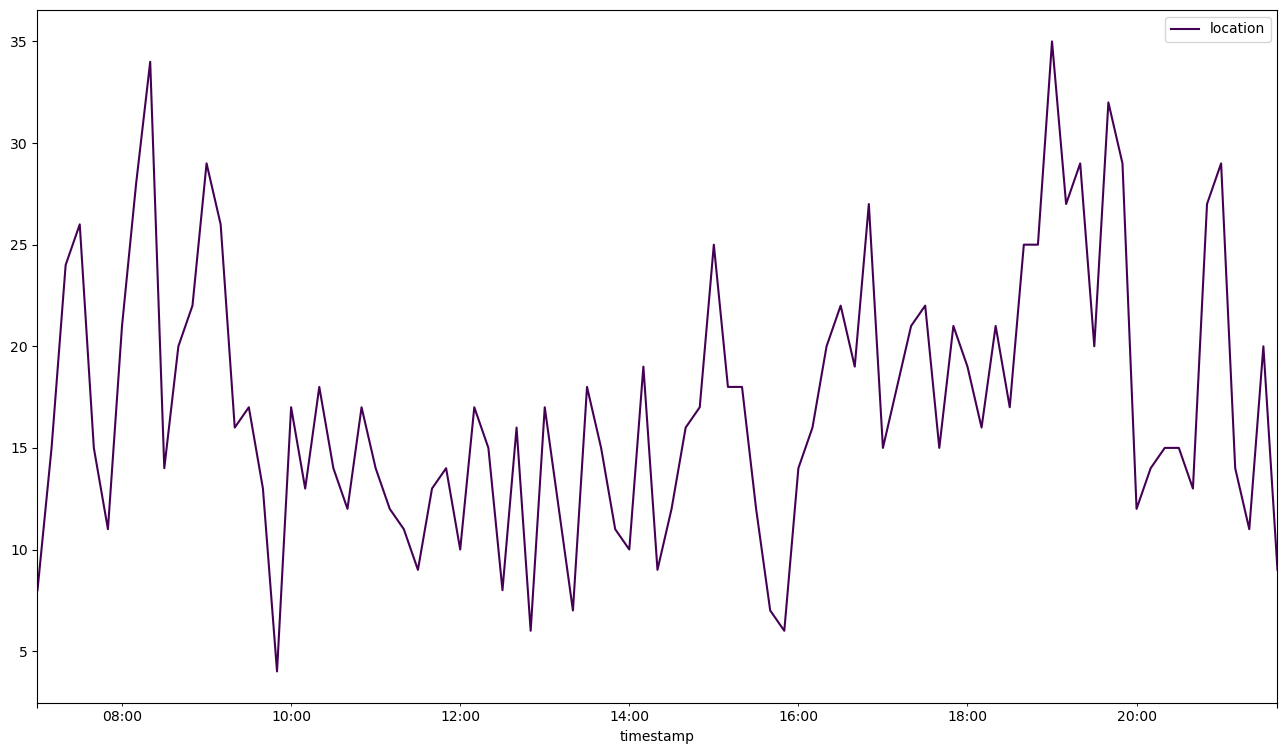

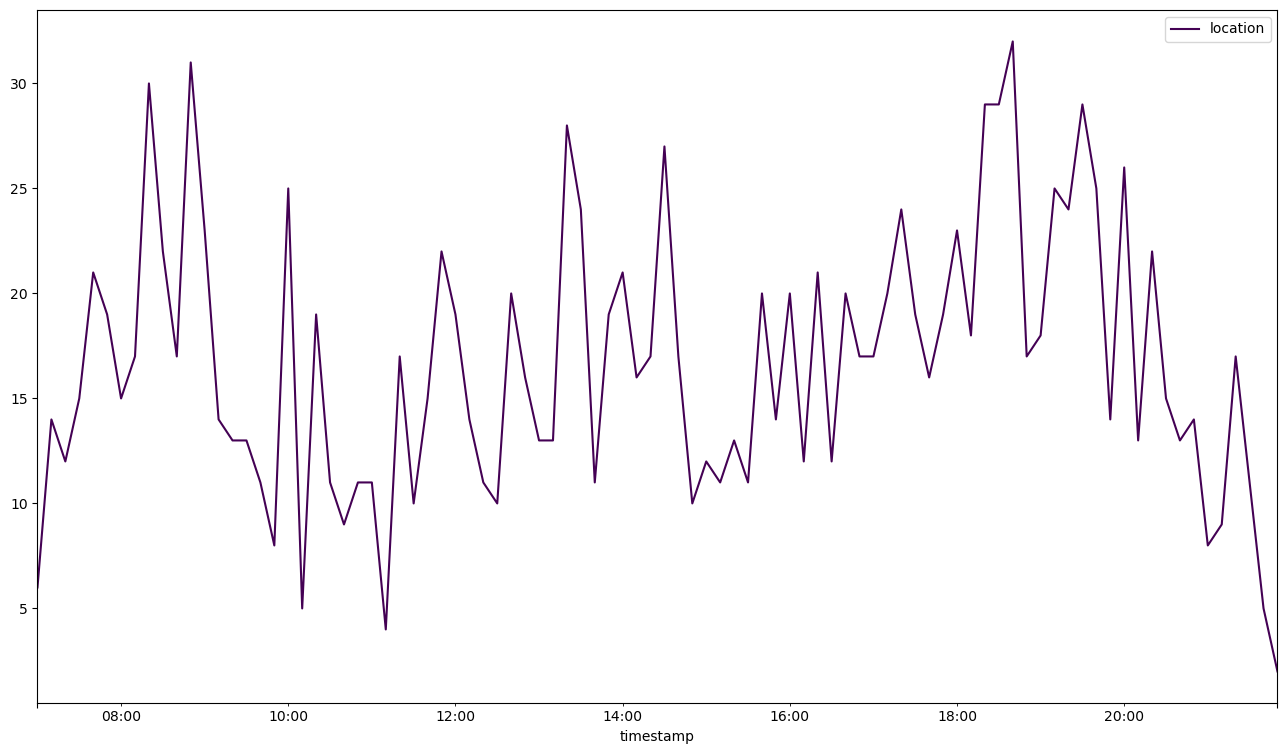

In [28]:
for day in [monday_filled_desample, tuesday_filled_desample, wednesday_filled_desample, thursday_filled_desample, friday_filled_desample]:    
    day[day['location'] == 'checkout'].resample('10T').count().plot(y='location', cmap='viridis')
    plt.gcf().set_size_inches(16, 9)

In [29]:
supermarket_all_groupped['from'] = supermarket_all_groupped['location'].shift(1)

In [30]:
matrix_count= pd.crosstab(supermarket_all_groupped['location'], supermarket_all_groupped['from'])

In [31]:
matrix_prob = pd.crosstab(supermarket_all_groupped['location'], supermarket_all_groupped['from'], normalize='index')

In [39]:
matrix_prob['entry'] = [0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
matrix_count.rename({'checkout': 'entry'}, inplace=True), matrix_prob.rename({'checkout': 'entry'}, inplace=True)

(None, None)

In [40]:
matrix_prob.to_csv('transition-propability-matrix.csv')

In [41]:
matrix_prob

from,checkout,dairy,drinks,fruit,spices,entry
location,,,,,,
entry,0.000000,0.246056,0.282594,0.344479,0.126871,0.0
dairy,0.120126,0.736848,0.005964,0.068700,0.068362,0.0
drinks,0.116492,0.107547,0.598705,0.071664,0.105593,0.0
fruit,0.220648,0.069956,0.067280,0.597183,0.044932,0.0
spices,0.214081,0.146225,0.134756,0.102899,0.402039,0.0


In [6]:
move_customers = pd.read_csv('/home/evangelo/evangelo-leo-0/evangelos-leo/Markov-chain-simulation-master/pydot-master/one_day_simulation_0.csv', sep=',')

In [9]:
move_customers['customer_id'].uniqueque()

array([   1,    2,    3, ..., 1487, 1488, 1489])

In [10]:
len(move_customers)

2978

In [12]:
move_customers.columns

Index(['time', 'location', 'customer_id'], dtype='object')

In [15]:
move_customers[move_customers['location']=='dairy'].count().sum(), 
move_customers[move_customers['location']=='drinks'].count().sum(),
move_customers[move_customers['location']=='dairy'].count().sum()



(1260, 1167)

In [3]:
customer_moves_morning = pd.read_csv('customer_moves_data_morning.csv')

In [12]:
customer_moves_morning.groupby('location').nunique()

,Unnamed: 0,minute,customer_id
location,,,
checkout,535,19,54
dairy,37,18,21
drinks,32,15,23
fruit,33,14,19
spices,25,12,18
